Analyse Exploratoire des Données (EDA)
## Dataset NSL-KDD

Dans cette section, nous réalisons une analyse exploratoire du dataset NSL-KDD.
L’objectif est de :

- Comprendre la structure des données
- Identifier les types de variables
- Détecter d’éventuels problèmes (valeurs manquantes, déséquilibre de classes)
- Observer les distributions
- Identifier des patterns utiles pour la classification

Cette étape est essentielle avant toute modélisation.

In [5]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [8]:
# Chargement du dataset
df = pd.read_csv("../data/KDDTrain.csv")

print("Shape du dataset :", df.shape)
print("\nAperçu des données :")



Shape du dataset : (125972, 43)

Aperçu des données :

On observe deux types principaux de variables :

- Variables numériques (int64, float64)
- Variables catégorielles (object)

Les variables catégorielles principales sont :
- protocol_type
- service
- flag
- outcome (label)



In [ ]:
df.info()
print("\nStatistiques descriptives :")


In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


On observe deux types principaux de variables :

- Variables numériques (int64, float64)
- Variables catégorielles (object)

Les variables catégorielles principales sont :
- protocol_type
- service
- flag
- outcome (label)


Les statistiques descriptives permettent d’identifier :

- Les écarts importants entre minimum et maximum
- Les variables très dispersées (ex: src_bytes, dst_bytes)
- La présence potentielle d’outliers

Certaines variables présentent des valeurs extrêmement élevées,
ce qui peut nécessiter une normalisation plus tard.


In [ ]:
df.isnull().sum().sum()


Aucune valeur manquante détectée.
Le dataset est propre et ne nécessite pas de traitement de NaN.


In [13]:
df['outcome'].value_counts()


outcome
normal    67342
attack    58630
Name: count, dtype: int64

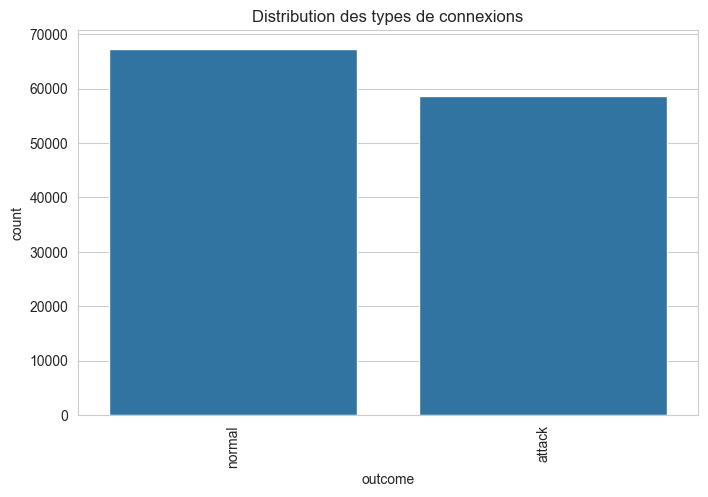

In [14]:
sns.countplot(data=df, x='outcome')
plt.xticks(rotation=90)
plt.title("Distribution des types de connexions")
plt.show()


In [ ]:
df['binary_label'] = df['outcome'].apply(lambda x: 0 if x == 'normal' else 1)

df['binary_label'].value_counts()
sns.countplot(data=df, x='binary_label')
plt.title("Distribution binaire (normal vs attaque)")
plt.show()

On observe un déséquilibre de classes.
Ce point est important car certains algorithmes peuvent être biaisés
vers la classe majoritaire.
Il faudra envisager des techniques de rééchantillonnage ou d’ajustement
des seuils de classification lors de la modélisation.

In [ ]:
features_to_plot = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']

df[features_to_plot].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


In [ ]:
sns.boxplot(data=df, x='binary_label', y='src_bytes')
plt.title("Distribution de src_bytes selon la classe")
plt.show()


In [ ]:
sns.boxplot(data=df, x='binary_label', y='duration')
plt.title("Durée selon la classe")
plt.show()

print(
"""
On observe des différences significatives entre les connexions normales
et les attaques.

Les attaques ont tendance à générer des volumes de données différents,
ce qui rend ces variables pertinentes pour la classification.
Il faudra approfondir l’analyse pour identifier les variables les plus discriminantes.
"""
)


In [ ]:
corr_matrix = df.corr(numeric_only=True)

top_corr_features = corr_matrix.index
plt.figure(figsize=(30, 25))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")


In [27]:
col_corr = set() 
def correlation(df, threshold):
  corr_matrix = df.corr(numeric_only=True)
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] 
              col_corr.add(colname)

In [28]:
correlation(df, 0.85)
col_corr

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [34]:
weak_col_corr = set()

def remove_weak_corr(df, threshold=0.01):
    corr_matrix = df.corr(numeric_only=True)
    for idx, feature_corr in enumerate(corr_matrix['binary_label']):
        if abs(feature_corr) < threshold:
            weak_col_corr.add(corr_matrix.columns[idx])

remove_weak_corr(df, 0.01)
print("Colonnes faiblement corrélées avec la cible :", weak_col_corr)

Colonnes faiblement corrélées avec la cible : {'dst_bytes', 'srv_count', 'num_failed_logins', 'src_bytes', 'land', 'urgent', 'num_shells', 'is_host_login'}


In [35]:
# 5️⃣ Suppression finale
del_col = col_corr.union(weak_col_corr)
df.drop(del_col, axis=1, inplace=True)
print("Shape du dataset après nettoyage :", df.shape)

Shape du dataset après nettoyage : (125972, 27)


In [ ]:
df.isnull().sum()

In [37]:
# Encodage des variables catégorielles
categorical_cols = ['protocol_type', 'service', 'flag']
df = pd.get_dummies(df, columns=categorical_cols)

In [39]:
# Séparation X / y
X = df.drop('outcome', axis=1)
y = df['outcome'].apply(lambda x: 0 if x == 'normal' else 1)

In [42]:
# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

In [45]:
# Standardisation
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred


In [83]:
clf.score(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 1.0


In [79]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



In [80]:
# the confusion matrix for our model
confusion_matrix(y_test, y_pred)

array([[13469,     0],
       [    0, 11726]])

<Axes: >

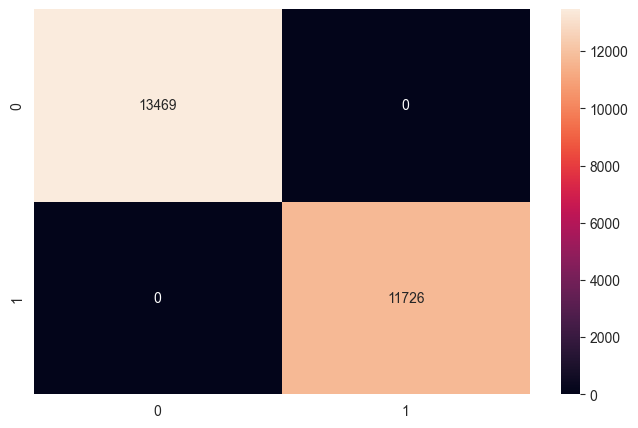

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')
